## Introduction

This notebook will use the data from the [data preparation notebook](https://github.com/charlier-su/seattle-weather/blob/main/seattle_weather_data_preparation.ipynb) to answer the question of whether it rains more in Seattle, WA than in St. Louis, MO.


## Import libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load clean data

The original data are from NOAA. We can use their [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) to request records of daily precipitation from Seattle and St. Louis (or other locations of interest) for the last 5 years (2018 - 2022). The original data we used are available on the repository as [seattle_rain.csv](https://github.com/charlier-su/seattle-weather/blob/main/seattle_rain.csv) and [stl_rain.csv](https://github.com/charlier-su/seattle-weather/blob/main/stl_rain.csv).

The data preparation was documented in the [data preparation notebook](https://github.com/charlier-su/seattle-weather/blob/main/seattle_weather_data_preparation.ipynb). The prepared data frame is available as a csv in the GitHub repository as [clean_seattle_stl_weather.csv](https://github.com/charlier-su/seattle-weather/blob/main/clean_seattle_stl_weather.csv). Here, we import it into the notebook:

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/charlier-su/seattle-weather/main/clean_seattle_stl_weather.csv')
df.head()

,date,city,precipitation,day_of_year,month,precipitation_rolling
0,2018-01-01,STL,0.0,1,1,NaN
1,2018-01-02,STL,0.0,2,1,NaN
2,2018-01-03,STL,0.0,3,1,NaN
3,2018-01-04,STL,0.0,4,1,NaN
4,2018-01-05,STL,0.0,5,1,NaN


`df` is the data frame we will be using. We can see that the available columns are `date`, `city`, `precipitation`, `day_of_year`, `month`, `precipitation_rolling`.

## Questions

The overall problem is to compare how much it rains in Seattle and St. Louis. Some ways we can approach this:
-  Which city, by month, has the most overall rain? (sum, daily average, either way)
-  Which city, by month, has the most days with no rain?
-  Which city, by month, has the "rainiest" rainy days?

We ask each question by month so that we can acknowledge that each city exhibits different behavior throughout the year.


## Analysis

### Which city, by month, has the most overall rain?
Here we will use seaborn to look at the average rainfall, broken down by month and city.


<Axes: xlabel='month', ylabel='precipitation'>

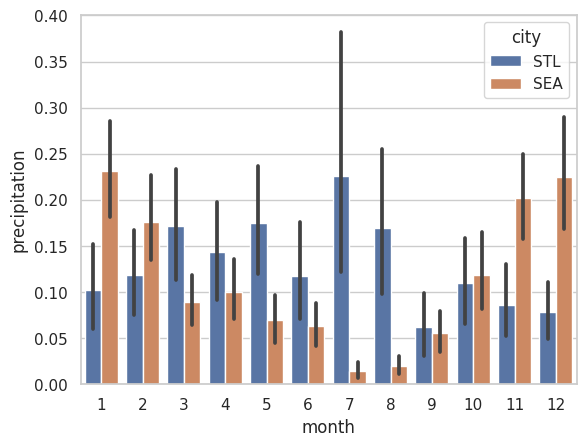

In [19]:
sns.barplot(data=df, x='month', y='precipitation', hue='city')

As we can see, Seattle has more rainfall during 7 months of the year.

### Which city, by month, has the most days with no rain?
We can make a boolean column called `no_rain` and take the average, by month and city, to find out which months have the most days with no rain.

Text(0, 0.5, 'Proportion of days with no rain')

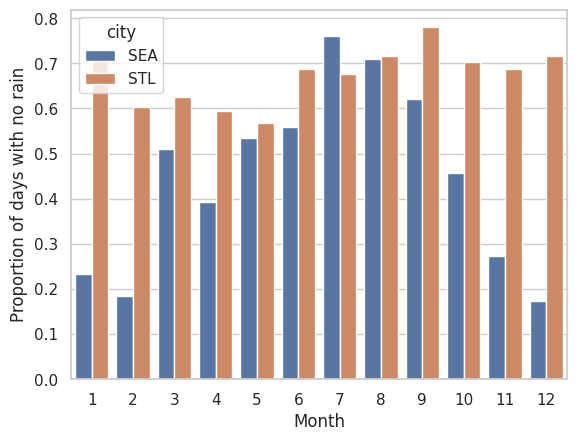

In [20]:
df['no_rain'] = df['precipitation'] == 0
average_rainless_days = df.groupby(['month', 'city'])['no_rain'].mean().reset_index()
sns.barplot(data=average_rainless_days, x='month', y='no_rain', hue='city')
plt.xlabel('Month')
plt.ylabel('Proportion of days with no rain')

For almost every month, St. Louis has more rainless days on average than Seattle, often by a large margin.

### Which city, by month, has the "rainiest" rainy days?
We know that it rains much more often in Seattle, but when it *does* rain in St. Louis, does it rain the same amount? If we make a list of `rainy_days` and take the average rainfall of them, by month and city, we can see the "raininess" of each city's rainy days:

<Axes: xlabel='month', ylabel='precipitation'>

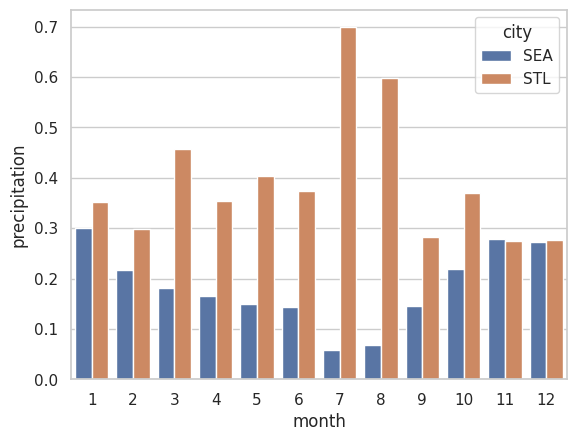

In [21]:
rainy_days = df[df['precipitation'] > 0]
average_rainfall_on_rainy_days = rainy_days.groupby(['month', 'city'])['precipitation'].mean().reset_index()
sns.barplot(data=average_rainfall_on_rainy_days, x='month', y='precipitation', hue='city')

As we can see, St. Louis' rainy days are significantly more intense than Seattle's.

### Further investigation
If we use a 7-day rolling average of the precipitation in both cities, we can get a more granular view into what a year of rain looks like in each city.

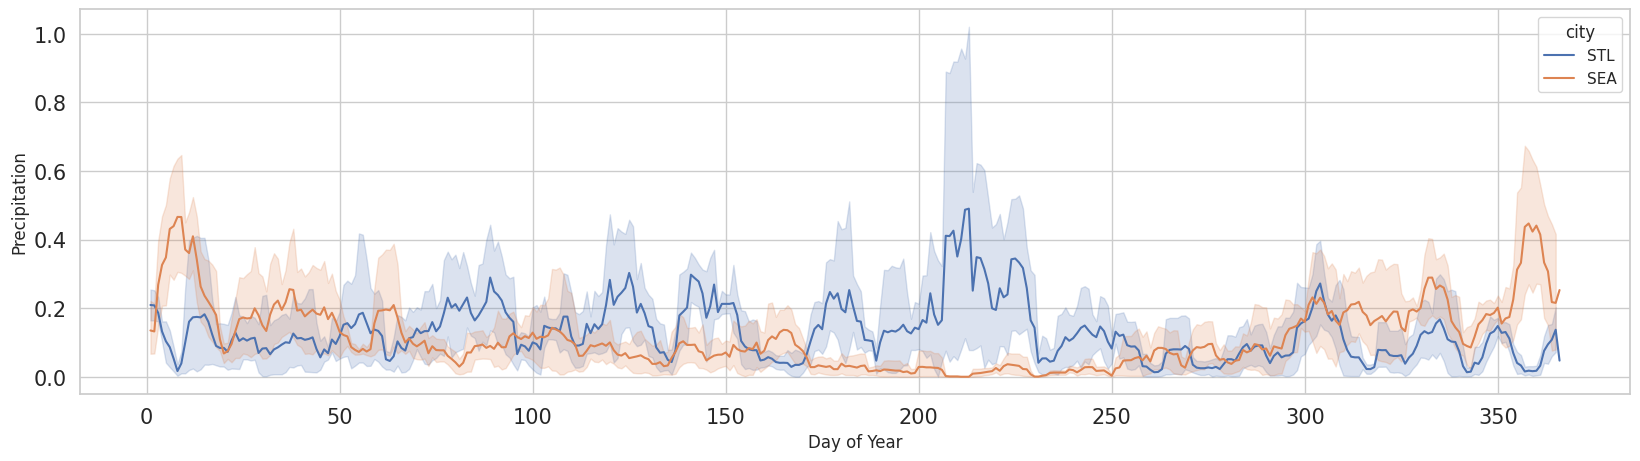

In [22]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df, x='day_of_year', y='precipitation_rolling', hue='city')
plt.xlabel('Day of Year')
plt.ylabel('Precipitation')
plt.tick_params(labelsize=15)

It looks like St. Louis has rainier summers and Seattle has rainier winters, with respect to both themselves and each other.

## Conclusion

This investigation explores whether it "rains more" in Seattle or St. Louis. There are several different things that this could mean. From our first graph, it appears that Seattle tends to be rainier than St. Louis for slightly more than half of each year. 

However, the characteristics of its rainfall are very different from that of St. Louis. With the exception of a brief period in the summer, rain will almost always be a more frequent occurence in the life of a Seattleite. This difference is especially apparent during the winter months, where most days in Seattle have rain, while most days in St. Louius don't.

This doesn't necessarily mean that Seattle has "more rain," though. When we look at the measurements for when it *does* rain in St. Louis, it becomes clear that rainy days in St. Louis have much more overall precipitation. On average, it beats Seattle in this category during 11 months of the year, often by a large margin.